In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rc('figure', figsize=(12, 6))
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [2]:
fec = pd.read_csv('P00000001-ALL.txt', low_memory=False)

In [3]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [4]:
# dictionary
parties

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [5]:
fec.cand_nm

0         Bachmann, Michelle
1         Bachmann, Michelle
2         Bachmann, Michelle
3         Bachmann, Michelle
4         Bachmann, Michelle
5         Bachmann, Michelle
6         Bachmann, Michelle
7         Bachmann, Michelle
8         Bachmann, Michelle
9         Bachmann, Michelle
10        Bachmann, Michelle
11        Bachmann, Michelle
12        Bachmann, Michelle
13        Bachmann, Michelle
14        Bachmann, Michelle
15        Bachmann, Michelle
16        Bachmann, Michelle
17        Bachmann, Michelle
18        Bachmann, Michelle
19        Bachmann, Michelle
20        Bachmann, Michelle
21        Bachmann, Michelle
22        Bachmann, Michelle
23        Bachmann, Michelle
24        Bachmann, Michelle
25        Bachmann, Michelle
26        Bachmann, Michelle
27        Bachmann, Michelle
28        Bachmann, Michelle
29        Bachmann, Michelle
                 ...        
536011           Perry, Rick
536012           Perry, Rick
536013           Perry, Rick
536014        

In [6]:
# map can take dictionary, series... 
# Alternatively, use list comprehension: [parties[x] for x in fec.cand_nm]
fec['party'] = fec.cand_nm.map(parties)              

In [7]:
# A single record.
fec.iloc[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                    366010290
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

In [8]:
# Doing it high level way using histogram. 
fec.party.value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [9]:
np.unique(fec.party)

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

In [10]:
fec.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [11]:
# Not a python date object.
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

In [12]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [13]:
print(months)

{'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}


In [14]:
# function to convert date to python's date object.
def convert_date(val):
    d, m, y = val.split('-')
    m = months[m]
    return pd.datetime(int ('20' + y), m, int(d))

# output a list of date (not yet in python objects).
fec.contb_receipt_dt
fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(convert_date)

In [15]:
fec.contb_receipt_dt[0]

Timestamp('2011-06-20 00:00:00')

In [16]:
# Same as above, however, date converted to python object.
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()

party       contb_receipt_dt
Democrat    2011-04-04           640235.12
            2011-04-05           307641.00
            2011-04-06           247542.59
            2011-04-07           252336.00
            2011-04-08           295452.00
            2011-04-09           105879.00
            2011-04-10           100373.00
            2011-04-11           360728.00
            2011-04-12           405160.46
            2011-04-13           382836.33
            2011-04-14           306643.50
            2011-04-15           408377.00
            2011-04-16            82658.00
            2011-04-17            70802.00
            2011-04-18           501971.37
            2011-04-19           304874.00
            2011-04-20           314540.11
            2011-04-21           315618.00
            2011-04-22           295464.45
            2011-04-23            34829.00
            2011-04-24            37100.00
            2011-04-25           447282.00
            2011-04-26   

In [17]:
by_date = fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()

In [18]:
# Indexes are dates. Columns are political parties.
by_date.unstack('party')

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,NaN,NaN,NaN,8600.00
2011-01-03,NaN,NaN,NaN,4800.00
2011-01-04,NaN,NaN,NaN,5000.00
2011-01-12,NaN,NaN,NaN,4150.00
2011-01-13,NaN,NaN,NaN,4000.00
2011-01-14,NaN,NaN,NaN,6000.00
2011-01-15,NaN,NaN,NaN,500.00
2011-01-16,NaN,NaN,NaN,750.00
2011-01-17,NaN,NaN,NaN,500.00


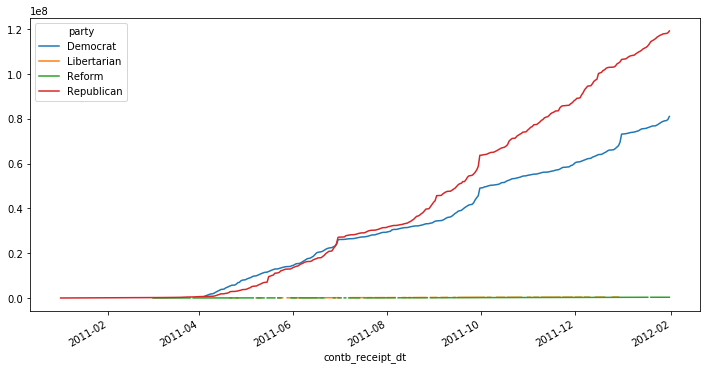

In [24]:
by_date.unstack('party').cumsum().plot()

In [25]:
s = by_date.unstack('party')[-5:].stack()

In [26]:
# Note the inner level indexes. Not every date has 3 parties. Top level indexes are dates. stack() makes 1 dimensional
# Labels propagated down for all 3 observations: political parties.
s

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41
dtype: float64

In [27]:
# unstack() 2 dimensional.
s.unstack()     

party,Democrat,Reform,Republican
contb_receipt_dt,,,
2012-01-27,305785.47,3176.37,368441.82
2012-01-28,235492.85,175.00,82775.80
2012-01-29,93177.00,200.00,75220.02
2012-01-30,435921.72,130.00,255204.80
2012-01-31,1418410.31,150.00,869890.41


In [28]:
# 2 dimensional to 1 dimensional
s.unstack().stack()

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41
dtype: float64

In [29]:
# data frame
df = s.unstack('party')

In [30]:
s.unstack('contb_receipt_dt')

contb_receipt_dt,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,
Democrat,305785.47,235492.85,93177.00,435921.72,1418410.31
Reform,3176.37,175.00,200.00,130.00,150.00
Republican,368441.82,82775.80,75220.02,255204.80,869890.41


In [33]:
# join 2 copies of data frame.
# standard hierarchical indexing stuff.
pd.concat([df, df], axis=1, keys=['A', 'B'])

A                               B           \
party               Democrat   Reform Republican    Democrat   Reform   
contb_receipt_dt                                                        
2012-01-27         305785.47  3176.37  368441.82   305785.47  3176.37   
2012-01-28         235492.85   175.00   82775.80   235492.85   175.00   
2012-01-29          93177.00   200.00   75220.02    93177.00   200.00   
2012-01-30         435921.72   130.00  255204.80   435921.72   130.00   
2012-01-31        1418410.31   150.00  869890.41  1418410.31   150.00   

                             
party            Republican  
contb_receipt_dt             
2012-01-27        368441.82  
2012-01-28         82775.80  
2012-01-29         75220.02  
2012-01-30        255204.80  
2012-01-31        869890.41

In [35]:
# select out columns by the first key 'A'. Or select out the 'B' group.conc
pd.concat([df, df], axis=1, keys=['A', 'B'])['A']

party,Democrat,Reform,Republican
contb_receipt_dt,,,
2012-01-27,305785.47,3176.37,368441.82
2012-01-28,235492.85,175.00,82775.80
2012-01-29,93177.00,200.00,75220.02
2012-01-30,435921.72,130.00,255204.80
2012-01-31,1418410.31,150.00,869890.41


In [36]:
pd.concat([df, df], axis=1, keys=['A', 'B']).stack('party')

A           B
contb_receipt_dt party                             
2012-01-27       Democrat     305785.47   305785.47
                 Reform         3176.37     3176.37
                 Republican   368441.82   368441.82
2012-01-28       Democrat     235492.85   235492.85
                 Reform          175.00      175.00
                 Republican    82775.80    82775.80
2012-01-29       Democrat      93177.00    93177.00
                 Reform          200.00      200.00
                 Republican    75220.02    75220.02
2012-01-30       Democrat     435921.72   435921.72
                 Reform          130.00      130.00
                 Republican   255204.80   255204.80
2012-01-31       Democrat    1418410.31  1418410.31
                 Reform          150.00      150.00
                 Republican   869890.41   869890.41

In [38]:
# The group indexes have no labels
pd.concat([df, df], axis=1, keys=['A', 'B']).stack(0)

party                 Democrat   Reform  Republican
contb_receipt_dt                                   
2012-01-27       A   305785.47  3176.37   368441.82
                 B   305785.47  3176.37   368441.82
2012-01-28       A   235492.85   175.00    82775.80
                 B   235492.85   175.00    82775.80
2012-01-29       A    93177.00   200.00    75220.02
                 B    93177.00   200.00    75220.02
2012-01-30       A   435921.72   130.00   255204.80
                 B   435921.72   130.00   255204.80
2012-01-31       A  1418410.31   150.00   869890.41
                 B  1418410.31   150.00   869890.41

In [39]:
# Top contributors to candidates by occupation.
result = fec.groupby(['cand_nm', 'contbr_occupation'])['contb_receipt_amt'].sum()

In [40]:
# is a data frame instead of series.
result

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

In [41]:
result[:, 'ZOMBIE SLAYER']

cand_nm
Paul, Ron    1556.0
Name: contb_receipt_amt, dtype: float64

In [42]:
# When doing this aggregation, we don't need to select the columns as above.
# There are columns that are not possible to sum. The code actually tries to sum them all: nuisance columns. 
# Whenever it fails, it just silently drops them out.
result = fec.groupby(['cand_nm', 'contbr_occupation']).sum()

In [43]:
# opposite of set_index(). Took 'cand_nm' and 'contbr_occupation' and set them as col indexes again, so that the indexes are just simple integer indexes.
result = result.reset_index()

In [44]:
result

,cand_nm,contbr_occupation,contb_receipt_amt,file_num
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50,6807894
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25,2260398
2,"Bachmann, Michelle",A/C AND HEAT,250.00,749016
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00,762366
4,"Bachmann, Michelle",ACCOUNT,50.00,762366
5,"Bachmann, Michelle",ACCOUNT ANALYST,200.00,749016
6,"Bachmann, Michelle",ACCOUNT EXECUTIVE,100.00,762366
7,"Bachmann, Michelle",ACCOUNT MANAGER,230.00,1524732
8,"Bachmann, Michelle",ACCOUNTANT,12979.00,49048913
9,"Bachmann, Michelle",ACCOUNTANT TRAINER,250.00,736307


In [47]:
# We have so far aggregated total amount donated to each political party by occupation (the first groupby).
# Additional groupby let us split them up by candidate, sort them in descending order by total amount donated and take the top 5.
def top5_donors(group):
    return group.sort_values(by='contb_receipt_amt')[-5:]
result.groupby('cand_nm').apply(top5_donors)
top5_donors(result)

,cand_nm,contbr_occupation,contb_receipt_amt,file_num
36317,"Romney, Mitt",HOMEMAKER,5442013.48,3071313520
36411,"Romney, Mitt",INFORMATION REQUESTED PER BEST EFFORTS,6394753.06,5099292740
37910,"Romney, Mitt",RETIRED,6483596.24,9766405414
7087,"Obama, Barack",ATTORNEY,7112343.35,10125124417
18857,"Obama, Barack",RETIRED,15086766.92,56651749795


In [48]:
result.groupby('cand_nm').apply(top5_donors)

cand_nm  \
cand_nm                                                                
Bachmann, Michelle             920                Bachmann, Michelle   
                               892                Bachmann, Michelle   
                               555                Bachmann, Michelle   
                               594                Bachmann, Michelle   
                               1058               Bachmann, Michelle   
Cain, Herman                   1536                     Cain, Herman   
                               2225                     Cain, Herman   
                               1897                     Cain, Herman   
                               2389                     Cain, Herman   
                               1928                     Cain, Herman   
Gingrich, Newt                 4065                   Gingrich, Newt   
                               4219                   Gingrich, Newt   
                               3559                   Gingrich, Newt   
                               3609                   Gingrich, Newt   
                               4481                   Gingrich, Newt   
Huntsman, Jon                  5466                    Huntsman, Jon   
                               4981                    Huntsman, Jon   
                               5285                    Huntsman, Jon   
                               5559                    Huntsman, Jon   
                               5298                    Huntsman, Jon   
Johnson, Gary Earl             5769               Johnson, Gary Earl   
                               5851               Johnson, Gary Earl   
                               5731               Johnson, Gary Earl   
                               5849               Johnson, Gary Earl   
                               5841               Johnson, Gary Earl   
McCotter, Thaddeus G           5902             McCotter, Thaddeus G   
                               5914             McCotter, Thaddeus G   
                               5900             McCotter, Thaddeus G   
                               5908             McCotter, Thaddeus G   
                               5898             McCotter, Thaddeus G   
...                                                              ...   
Paul, Ron                      25801                       Paul, Ron   
                               28343                       Paul, Ron   
                               27643                       Paul, Ron   
                               24952                       Paul, Ron   
                               28455                       Paul, Ron   
Pawlenty, Timothy              30752               Pawlenty, Timothy   
                               30895               Pawlenty, Timothy   
                               30511               Pawlenty, Timothy   
                               30971               Pawlenty, Timothy   
                               30744               Pawlenty, Timothy   
Perry, Rick                    31198                     Perry, Rick   
                               32344                     Perry, Rick   
                               32538                     Perry, Rick   
                               31873                     Perry, Rick   
                               31909                     Perry, Rick   
Roemer, Charles E. 'Buddy' III 34265  Roemer, Charles E. 'Buddy' III   
                               33530  Roemer, Charles E. 'Buddy' III   
                               32996  Roemer, Charles E. 'Buddy' III   
                               33576  Roemer, Charles E. 'Buddy' III   
                               34117  Roemer, Charles E. 'Buddy' III   
Romney, Mitt                   37406                    Romney, Mitt   
                               34625                    Romney, Mitt   
                               36317                    Romney, Mitt   
                             

In [50]:
result.groupby('cand_nm').apply(top5_donors)['contbr_occupation']

cand_nm                              
Bachmann, Michelle              920                                   PRESIDENT
                                892                                   PHYSICIAN
                                555                                   HOMEMAKER
                                594                       INFORMATION REQUESTED
                                1058                                    RETIRED
Cain, Herman                    1536                                        CEO
                                2225                                  PHYSICIAN
                                1897                                  HOMEMAKER
                                2389                                    RETIRED
                                1928                      INFORMATION REQUESTED
Gingrich, Newt                  4065                                      OWNER
                                4219                                  PRESIDENT
  

In [49]:
# Internal data structure. The back data frame. Having hierarchical indexing medicates a lot of the need for higher dimensional objects (because they're very sparse).
df._data

BlockManager
Items: Index(['Democrat', 'Reform', 'Republican'], dtype='object', name='party')
Axis 1: DatetimeIndex(['2012-01-27', '2012-01-28', '2012-01-29', '2012-01-30',
               '2012-01-31'],
              dtype='datetime64[ns]', name='contb_receipt_dt', freq=None)
FloatBlock: slice(0, 3, 1), 3 x 5, dtype: float64

In [ ]:
# Time Series for financial data will be improved next.